In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

warnings.filterwarnings("ignore", message="Workbook contains no default style")

FILE_PATH = 'C:\\Users\\vladi\\.vscode\\Git\\SM_25\\SM_25\\cursova\\'
RUN_TIME = 1440.0

In [3]:
def calc_stats(df):
    loader1_busy_time = df['Loader1_busyTime']
    loader2_busy_time = df['Loader2_busyTime']

    truck1_served = df["Truck1_served"]
    truck1_busy_time = df["Truck1_busyTime"]
    truck1_cooldownTime = df["Truck1_cooldownTime"]

    truck2_served = df["Truck2_served"]
    truck2_busy_time = df["Truck2_busyTime"]
    truck2_cooldownTime = df["Truck2_cooldownTime"]

    truck3_served = df["Truck3_served"]
    truck3_busy_time = df["Truck3_busyTime"]
    truck3_cooldownTime = df["Truck3_cooldownTime"]

    truck4_served = df["Truck4_served"]
    truck4_busy_time = df["Truck4_busyTime"]
    truck4_cooldownTime = df["Truck4_cooldownTime"]

    queue_served = df['Queue_served']
    queue_pair_avg_wt = df['Queue_pair_avg_wt']

    truck_served = truck1_served + truck2_served + truck3_served + truck4_served

    truck_utilization = (
        (loader1_busy_time + loader2_busy_time) + 
        (truck1_busy_time + truck2_busy_time + truck3_busy_time + truck4_busy_time) +
        (truck1_cooldownTime + truck2_cooldownTime + truck3_cooldownTime + truck4_cooldownTime)
    ) / RUN_TIME / 4

    productivity = truck_served / RUN_TIME
    processing_time = (
        (queue_pair_avg_wt * queue_served / 2) + 
        loader1_busy_time + 
        loader2_busy_time +
        truck1_busy_time +
        truck2_busy_time +
        truck3_busy_time +
        truck4_busy_time
    ) / truck_served

    df['Mean_loader_util'] = (df['Loader1_utilization'] + df['Loader2_utilization']) / 2
    df['Truck_served'] = truck_served
    df['Truck_utilization'] = truck_utilization
    df['Productivity'] = productivity
    df['ProcessingTime'] = processing_time
   


def get_result_stats(df):
    df = df.copy()
    calc_stats(df)
    df = df.groupby('test_mask').mean().reset_index()

    return df[[
        'total_time',
        'Producer1_served', 
        'Queue_served',
        'Queue_pair_avg_sz',
        'Queue_pair_avg_wt',
        'Con0_throughput',
        'Con0_availability',
        'Loader1_utilization',
        'Loader1_served',
        'Loader2_utilization',
        'Loader2_served',
        'Truck_served',
        'Mean_loader_util',
        'Truck_utilization',
        'Productivity',
        'ProcessingTime'
    ]].copy()

In [4]:
def get_verification():
    filename = 'verification'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")
    return get_result_stats(df)

get_verification()

,total_time,Producer1_served,Queue_served,Queue_pair_avg_sz,Queue_pair_avg_wt,Con0_throughput,Con0_availability,Loader1_utilization,Loader1_served,Loader2_utilization,Loader2_served,Truck_served,Mean_loader_util,Truck_utilization,Productivity,ProcessingTime
0,1440.0,179.311,174.052,1.596921,26.126492,16.581050,0.332941,0.545944,41.516,0.526062,44.719,84.573,0.536003,0.872858,0.058731,67.686003
1,1440.0,359.707,188.978,42.094822,642.907429,15.258687,0.151515,0.593473,44.865,0.574828,48.811,91.815,0.584151,0.947791,0.063760,702.572669
2,1440.0,179.631,177.326,0.722334,11.508770,16.280983,0.438243,0.405109,48.408,0.466665,39.698,86.397,0.435887,0.834535,0.059998,48.818011
3,1440.0,179.446,177.172,0.724496,11.535758,16.295278,0.439937,0.485373,37.152,0.388312,50.869,86.313,0.436842,0.835868,0.059940,48.960462
4,1440.0,179.686,175.290,1.316759,21.357643,16.463349,0.368870,0.434662,41.892,0.405388,44.945,85.124,0.420025,0.879010,0.059114,62.823525
5,1440.0,179.408,178.084,0.358736,5.703255,16.215566,0.544511,0.559522,42.366,0.541935,45.847,87.253,0.550728,0.728132,0.060592,35.234117
6,1440.0,179.977,176.216,1.237162,19.943749,16.380071,0.361095,0.554202,42.046,0.535714,45.254,85.710,0.544958,0.854693,0.059521,59.267592
7,1440.0,180.183,178.644,0.459535,7.256160,16.166218,0.506163,0.559896,42.329,0.542707,46.151,86.786,0.551301,0.754786,0.060268,48.212337


In [5]:
def get_trans_period():
    filename = 'trans'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")
    return get_result_stats(df)

trans = get_trans_period()
trans

,total_time,Producer1_served,Queue_served,Queue_pair_avg_sz,Queue_pair_avg_wt,Con0_throughput,Con0_availability,Loader1_utilization,Loader1_served,Loader2_utilization,Loader2_served,Truck_served,Mean_loader_util,Truck_utilization,Productivity,ProcessingTime
0,1440.0,179.564,174.268,1.619566,26.489543,16.557167,0.331579,0.545508,41.497,0.530598,44.829,84.653,0.538053,0.873159,0.058787,68.079478
1,5440.0,179.374,179.456,3.484678,54.988011,16.082988,0.257931,0.567683,43.038,0.548791,46.695,89.745,0.558237,0.920892,0.062323,95.306757
2,9440.0,180.093,179.996,3.804335,59.864438,16.036136,0.254024,0.570224,43.182,0.552460,46.822,89.930,0.561342,0.922215,0.062451,100.248929
3,13440.0,180.141,180.130,4.052246,63.724912,16.024545,0.251051,0.569271,43.388,0.552814,46.706,90.121,0.561043,0.924904,0.062584,103.991286
4,17440.0,179.857,179.828,3.921078,61.748567,16.047485,0.250461,0.570694,43.275,0.551888,46.634,89.970,0.561291,0.924085,0.062479,102.054609


In [6]:
trans1 = trans.copy()
trans1['total_time'] = trans1['total_time'] - RUN_TIME

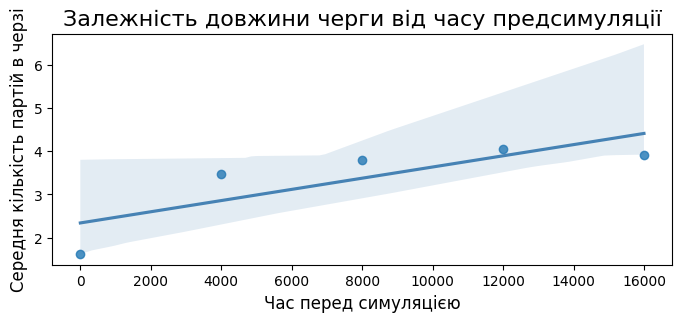

In [7]:
plt.figure(figsize=(8, 3)) 

sns.regplot(
    data=trans1,
    x='total_time',
    y='Queue_pair_avg_sz',
    scatter=True,
    line_kws={"color": "#4682b4"},
)

plt.title('Залежність довжини черги від часу предсимуляції', fontsize=16)
plt.xlabel('Час перед симуляцією', fontsize=12)
plt.ylabel('Середня кількість партій в черзі', fontsize=12)

plt.show()

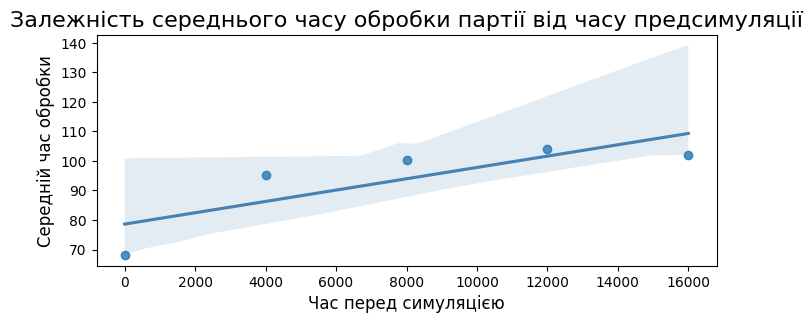

In [8]:
plt.figure(figsize=(8, 3)) 

sns.regplot(
    data=trans1,
    x='total_time',
    y='ProcessingTime',
    scatter=True,
    line_kws={"color": "#4682b4"},
)

plt.title('Залежність середнього часу обробки партії від часу предсимуляції', fontsize=16)
plt.xlabel('Час перед симуляцією', fontsize=12)
plt.ylabel('Середній час обробки', fontsize=12)

plt.show()

Text(0, 0.5, 'Середня продуктивність')

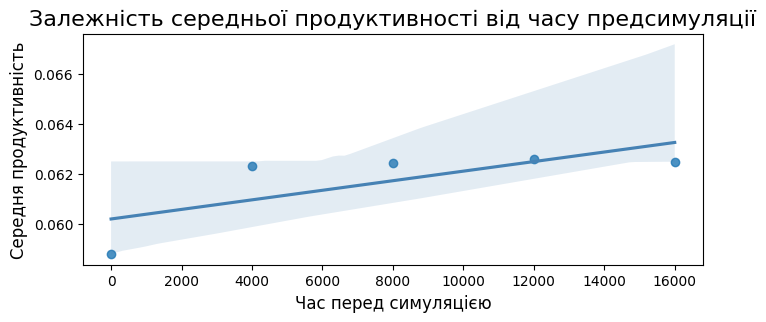

In [9]:
plt.figure(figsize=(8, 3)) 

sns.regplot(
    data=trans1,
    x='total_time',
    y='Productivity',
    scatter=True,
    line_kws={"color": "#4682b4"},
)

plt.title('Залежність середньої продуктивності від часу предсимуляції', fontsize=16)
plt.xlabel('Час перед симуляцією', fontsize=12)
plt.ylabel('Середня продуктивність', fontsize=12)

In [10]:
def get_result():
    filename = 'result'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")
    calc_stats(df)
    return df

result = get_result()
result

,test_mask,total_time,Producer1_utilization,Producer1_served,Queue_avg_sz,Queue_avg_wt,Queue_pair_avg_sz,Queue_pair_avg_wt,Queue_served,Queue_total_wait_time,...,Truck3_served,Truck4_utilization,Truck4_busyTime,Truck4_cooldownTime,Truck4_served,Mean_loader_util,Truck_served,Truck_utilization,Productivity,ProcessingTime
0,0,13440,1,177,3.680227,29.441816,1.575309,25.204943,180,5299.526796,...,23,0.765376,610.631951,491.509229,24,0.557319,90,0.929906,0.062500,64.913122
1,0,13440,1,170,33.281228,252.236672,16.400949,248.603860,190,47924.967685,...,24,0.713466,565.306429,462.083939,24,0.610065,94,0.956692,0.065278,289.357442
2,0,13440,1,172,4.797531,38.811490,2.153062,34.836059,178,6908.445166,...,20,0.739509,617.547686,447.345615,25,0.572135,90,0.901012,0.062500,72.987151
3,0,13440,1,182,2.721571,22.017204,1.103891,17.860714,178,3919.062242,...,20,0.688415,594.816382,396.501287,23,0.559761,86,0.895152,0.059722,59.833861
4,0,13440,1,181,3.978956,31.481851,1.740182,27.536939,182,5729.696829,...,23,0.689698,620.094118,373.070416,21,0.566179,91,0.901048,0.063194,66.572346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,13440,1,181,5.096025,39.453099,2.275895,35.239662,186,7338.276372,...,24,0.752723,634.955013,448.965576,23,0.599392,93,0.949435,0.064583,75.765353
996,0,13440,1,196,11.002962,80.838085,5.247247,77.102405,196,15844.264586,...,26,0.737581,628.777625,433.338368,22,0.558089,99,0.962646,0.068750,114.091484
997,0,13440,1,182,6.578125,55.072673,3.018701,50.545696,172,9472.499691,...,23,0.735780,619.291002,440.231689,20,0.599963,86,0.928251,0.059722,93.555945
998,0,13440,1,190,6.394423,49.505209,2.946733,45.626833,186,9207.968835,...,23,0.758626,649.343314,443.078057,24,0.544931,93,0.960610,0.064583,87.345169


In [11]:
get_result_stats(result)

,total_time,Producer1_served,Queue_served,Queue_pair_avg_sz,Queue_pair_avg_wt,Con0_throughput,Con0_availability,Loader1_utilization,Loader1_served,Loader2_utilization,Loader2_served,Truck_served,Mean_loader_util,Truck_utilization,Productivity,ProcessingTime
0,13440.0,179.773,179.916,3.880093,61.009763,16.041041,0.252295,0.57195,43.488,0.550761,46.462,89.987,0.561356,0.923885,0.062491,101.344639


In [12]:
df = result

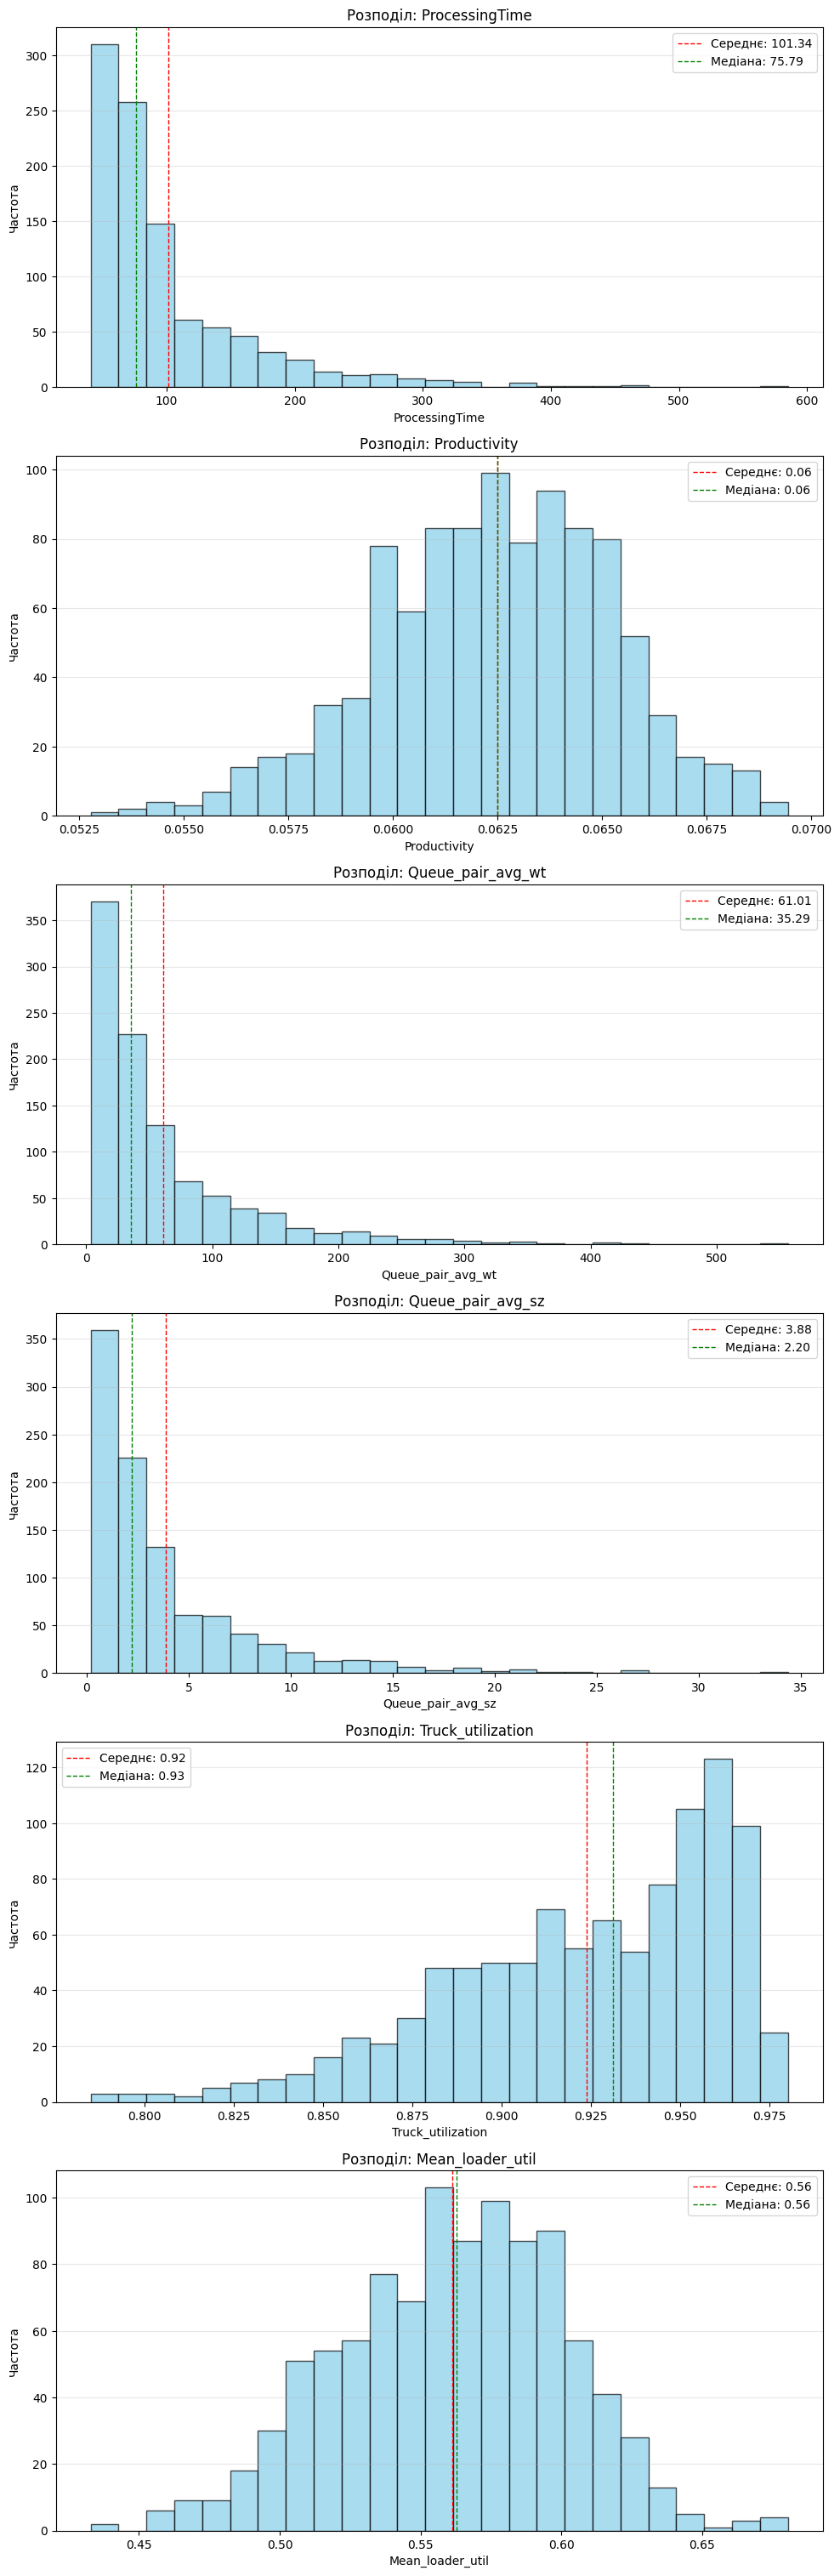

In [13]:
import matplotlib.pyplot as plt

columns_to_plot = [
    'ProcessingTime', 
    'Productivity', 
    'Queue_pair_avg_wt', 
    'Queue_pair_avg_sz',
    'Truck_utilization', 
    'Mean_loader_util'
]

num_plots = len(columns_to_plot)
cols = 1 
rows = (num_plots + 1) // cols

plt.figure(figsize=(10, 5 * rows))

for i, col_name in enumerate(columns_to_plot):
    if col_name in df.columns:
        plt.subplot(rows, cols, i + 1)
        
        plt.hist(df[col_name], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
        
        mean_val = df[col_name].mean()
        median_val = df[col_name].median()
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Середнє: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Медіана: {median_val:.2f}')
        
        plt.title(f'Розподіл: {col_name}')
        plt.xlabel(col_name)
        plt.ylabel('Частота')
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
    else:
        print(f"Увага: Стовпець '{col_name}' не знайдено в DataFrame")

plt.tight_layout()
plt.show()

In [14]:
def calc_mod_stats(df):
    loader1_busy_time = df['Loader1_busyTime']
    loader2_busy_time = df['Loader2_busyTime']

    truck1_served = df["Truck1_served"]
    truck1_busy_time = df["Truck1_busyTime"]
    truck1_cooldownTime = df["Truck1_cooldownTime"]

    truck2_served = df["Truck2_served"]
    truck2_busy_time = df["Truck2_busyTime"]
    truck2_cooldownTime = df["Truck2_cooldownTime"]

    truck3_served = df["Truck3_served"]
    truck3_busy_time = df["Truck3_busyTime"]
    truck3_cooldownTime = df["Truck3_cooldownTime"]

    truck4_served = df["Truck4_served"]
    truck4_busy_time = df["Truck4_busyTime"]
    truck4_cooldownTime = df["Truck4_cooldownTime"]

    truck5_served = df["Truck5_served"]
    truck5_busy_time = df["Truck5_busyTime"]
    truck5_cooldownTime = df["Truck5_cooldownTime"]

    queue_served = df['Queue_served']
    queue_pair_avg_wt = df['Queue_pair_avg_wt']

    truck_served = truck1_served + truck2_served + truck3_served + truck4_served + truck5_served

    truck_utilization = (
        (loader1_busy_time + loader2_busy_time) + 
        (truck1_busy_time + truck2_busy_time + truck3_busy_time + truck4_busy_time + truck5_busy_time) +
        (truck1_cooldownTime + truck2_cooldownTime + truck3_cooldownTime + truck4_cooldownTime + truck5_cooldownTime)
    ) / RUN_TIME / 5

    productivity = truck_served / RUN_TIME
    processing_time = (
        (queue_pair_avg_wt * queue_served / 2) + 
        loader1_busy_time + 
        loader2_busy_time +
        truck1_busy_time +
        truck2_busy_time +
        truck3_busy_time +
        truck4_busy_time +
        truck5_busy_time
    ) / truck_served

    df['Mean_loader_util'] = (df['Loader1_utilization'] + df['Loader2_utilization']) / 2
    df['Truck_served'] = truck_served
    df['Truck_utilization'] = truck_utilization
    df['Productivity'] = productivity
    df['ProcessingTime'] = processing_time
   

def get_result_mod_stats(df):
    df = df.copy()
    calc_mod_stats(df)
    df = df.groupby('test_mask').mean().reset_index()

    return df[[
        'total_time',
        'Producer1_served', 
        'Queue_served',
        'Queue_pair_avg_sz',
        'Queue_pair_avg_wt',
        'Con0_throughput',
        'Con0_availability',
        'Loader1_utilization',
        'Loader1_served',
        'Loader2_utilization',
        'Loader2_served',
        'Truck_served',
        'Mean_loader_util',
        'Truck_utilization',
        'Productivity',
        'ProcessingTime'
    ]].copy()

In [21]:
def get_mod():
    filename = 'mod'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")
    calc_mod_stats(df)
    return df

mod = get_mod()
mod

,test_mask,total_time,Producer1_utilization,Producer1_served,Queue_avg_sz,Queue_avg_wt,Queue_pair_avg_sz,Queue_pair_avg_wt,Queue_served,Queue_total_wait_time,...,Truck4_served,Truck5_utilization,Truck5_busyTime,Truck5_cooldownTime,Truck5_served,Mean_loader_util,Truck_served,Truck_utilization,Productivity,ProcessingTime
0,0,13440,1,173,0.770418,6.375873,0.140744,2.329555,174,1109.401960,...,21,0.572855,543.338489,281.572462,18,0.484818,87,0.681251,0.060417,39.319493
1,0,13440,1,155,0.708319,6.538333,0.099826,1.842945,156,1019.980007,...,13,0.480833,390.066598,302.333562,15,0.533940,78,0.656562,0.054167,43.898891
2,0,13440,1,177,0.695005,5.686404,0.101219,1.656317,176,1000.807133,...,14,0.577684,472.999902,358.865223,16,0.530947,89,0.718222,0.061806,41.182999
3,0,13440,1,187,1.170046,8.962054,0.344813,5.282242,188,1684.866158,...,21,0.570318,482.335802,338.922127,17,0.573500,96,0.781468,0.066667,44.512437
4,0,13440,1,191,1.771185,13.146942,0.643507,9.553101,194,2550.506666,...,17,0.605756,524.739292,347.549052,20,0.617162,99,0.789283,0.068750,49.121709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,13440,1,193,1.454786,10.910896,0.468870,7.033053,192,2094.892122,...,21,0.519594,394.119246,354.096137,17,0.598191,97,0.810013,0.067361,46.596880
996,0,13440,1,180,1.059112,8.379788,0.271087,4.289727,182,1525.121482,...,18,0.690920,587.925901,406.998668,20,0.612592,92,0.779557,0.063889,45.707605
997,0,13440,1,169,0.763798,6.394589,0.123860,2.073931,172,1099.869352,...,18,0.662443,577.962259,375.955031,19,0.508311,87,0.717761,0.060417,43.355071
998,0,13440,1,182,0.783691,6.200635,0.138745,2.195530,182,1128.515547,...,20,0.564048,521.291689,290.937492,18,0.550488,89,0.742744,0.061806,43.984283


In [22]:
df = mod

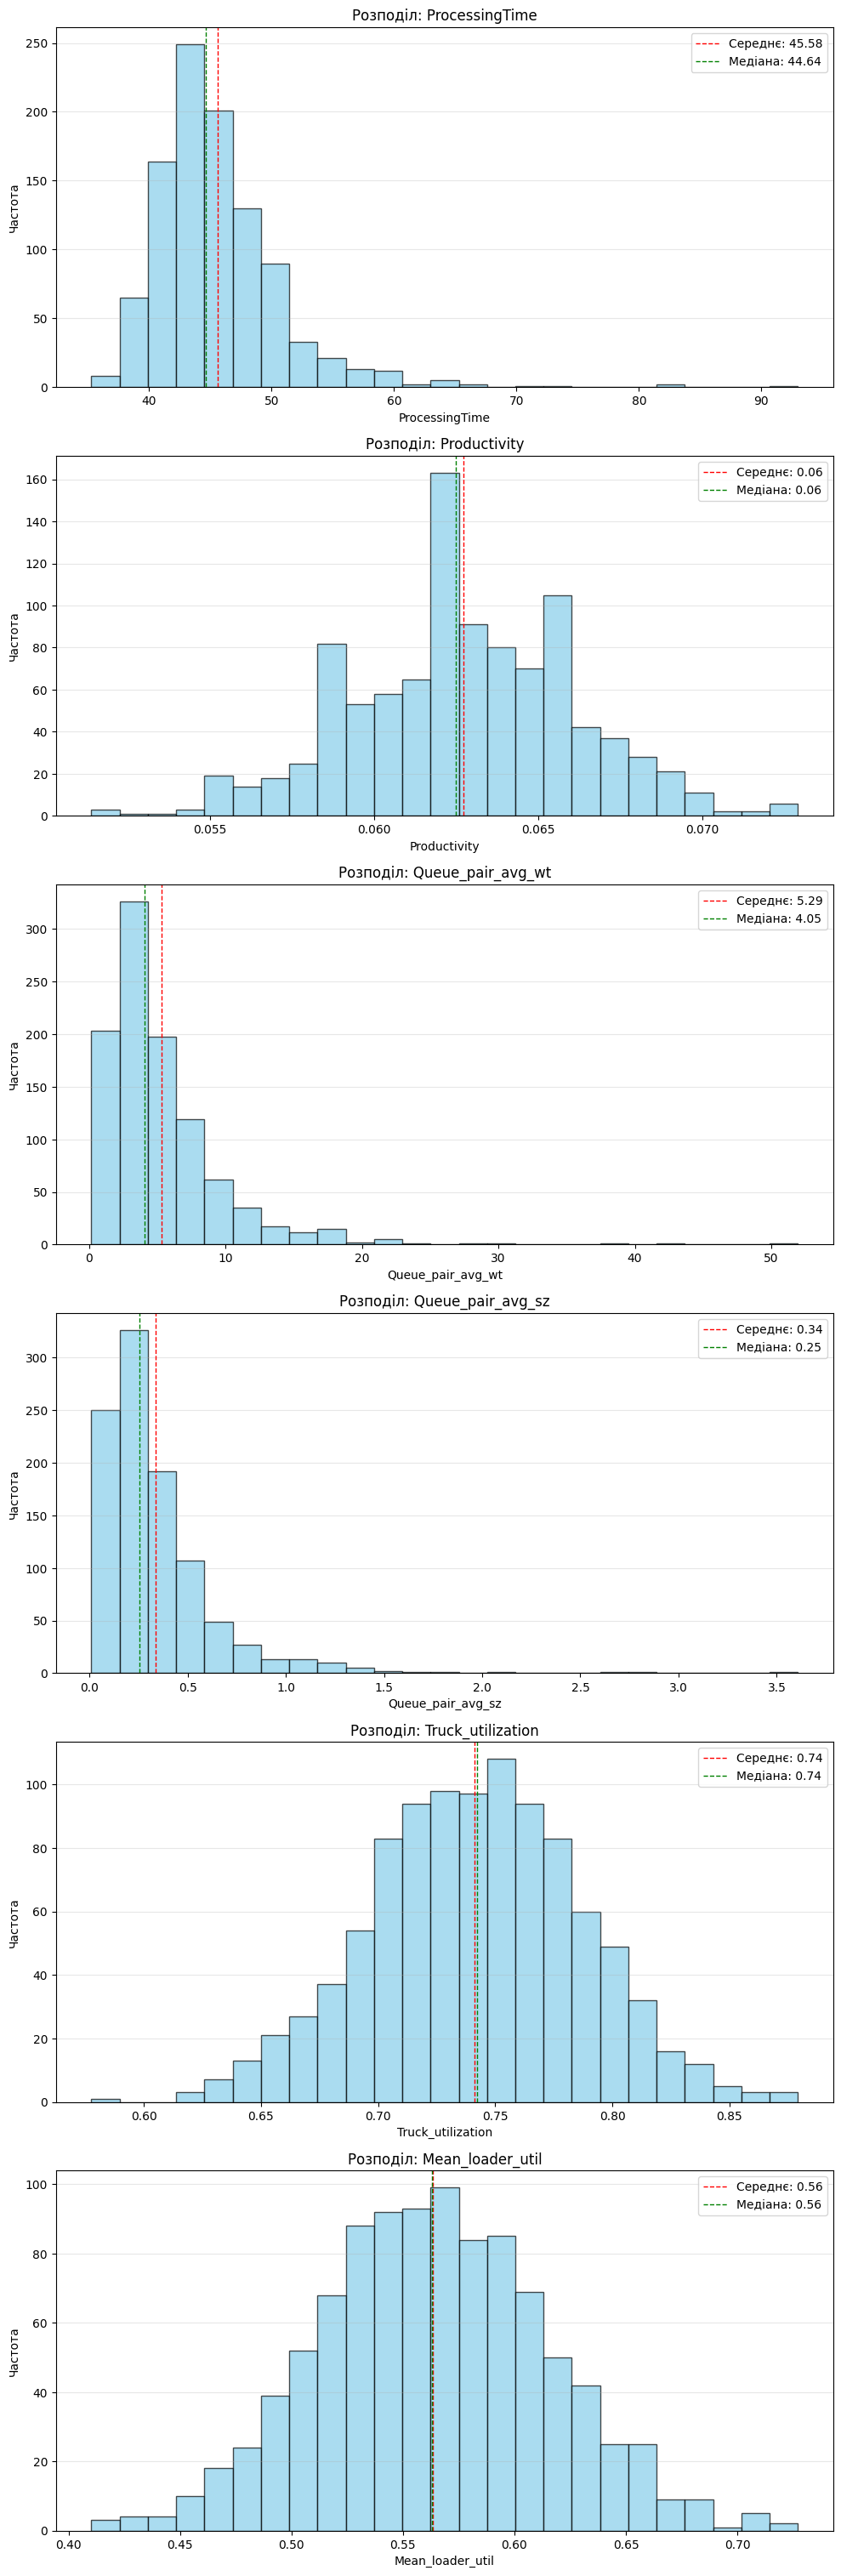

In [24]:
import matplotlib.pyplot as plt

columns_to_plot = [
    'ProcessingTime', 
    'Productivity', 
    'Queue_pair_avg_wt', 
    'Queue_pair_avg_sz',
    'Truck_utilization', 
    'Mean_loader_util'
]

num_plots = len(columns_to_plot)
cols = 1 
rows = (num_plots + 1) // cols

plt.figure(figsize=(10, 5 * rows))

for i, col_name in enumerate(columns_to_plot):
    if col_name in df.columns:
        plt.subplot(rows, cols, i + 1)
        
        plt.hist(df[col_name], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
        
        mean_val = df[col_name].mean()
        median_val = df[col_name].median()
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Середнє: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Медіана: {median_val:.2f}')
        
        plt.title(f'Розподіл: {col_name}')
        plt.xlabel(col_name)
        plt.ylabel('Частота')
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
    else:
        print(f"Увага: Стовпець '{col_name}' не знайдено в DataFrame")

plt.tight_layout()
plt.show()

In [18]:
get_result_mod_stats(mod)

,total_time,Producer1_served,Queue_served,Queue_pair_avg_sz,Queue_pair_avg_wt,Con0_throughput,Con0_availability,Loader1_utilization,Loader1_served,Loader2_utilization,Loader2_served,Truck_served,Mean_loader_util,Truck_utilization,Productivity,ProcessingTime
0,13440.0,180.477,180.47,0.338351,5.291368,16.006093,0.565735,0.571637,43.412,0.555298,46.874,90.331,0.563467,0.74129,0.06273,45.582022


In [38]:
get_result_stats(result)

,total_time,Producer1_served,Queue_served,Queue_pair_avg_sz,Queue_pair_avg_wt,Con0_throughput,Con0_availability,Loader1_utilization,Loader1_served,Loader2_utilization,Loader2_served,Truck_served,Mean_loader_util,Truck_utilization,Productivity,ProcessingTime
0,13440.0,179.773,179.916,3.880093,61.009763,16.041041,0.252295,0.57195,43.488,0.550761,46.462,89.987,0.561356,0.923885,0.062491,101.344639
